<a href="https://colab.research.google.com/github/PChan8128/Pchan8128.github.io/blob/main/PC7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import PCA
data = pd.read_csv("/content/data.csv")

**1. K Means Clustering using all features except DEATH_EVENT.**

The 'DEATH_EVENT' column is removed from the dataset, features are scaled, and K-Means clustering is applied to assign each row a cluster label based on the scaled features.

In [ ]:
# Remove 'DEATH_EVENT' column
features = data.drop(columns=['DEATH_EVENT'])

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  Cluster  
0        0     4            1        0  
1        0     6      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**2. Determing and visualizing optimal number of clusters**

The elbow method is utilized to determine the optimal number of clusters for K-Means clustering. The within-cluster sum of squares (WCSS) is calculated for varying numbers of clusters, and an elbow curve is plotted to identify the point of diminishing returns. Based on this analysis, an optimal number of clusters (k=2) is determined. Then, K-Means clustering is applied with this optimal k value, and the resulting clusters are visualized in a scatter plot. Finally, a conclusion is printed, stating the optimal number of clusters and summarizing the clustering process.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

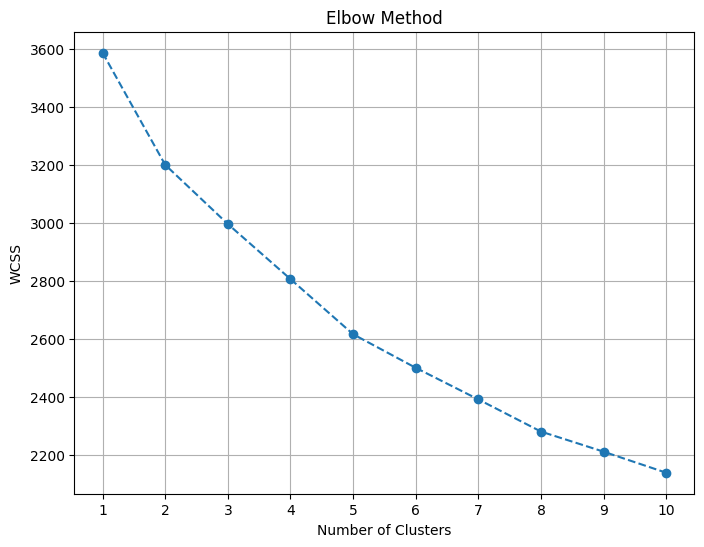

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


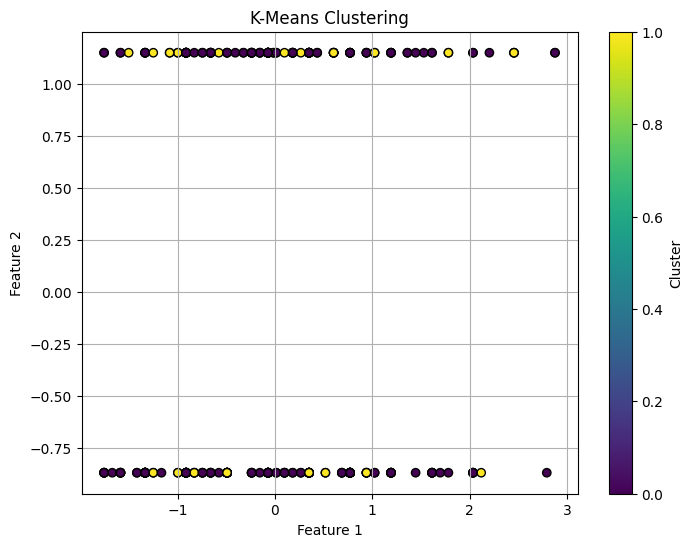

Based on the elbow method, the optimal number of clusters appears to be 2.
The K-Means clustering algorithm was applied to the dataset, and the clusters were visualized.


In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# From the elbow method, determine the optimal number of clusters
# Let's assume we observe the elbow at k=2

# Apply K-Means clustering with the optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Visualize the clusters (assuming only two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Conclusion
print(f"Based on the elbow method, the optimal number of clusters appears to be {optimal_k}.")
print("The K-Means clustering algorithm was applied to the dataset, and the clusters were visualized.")

**3. Implement Kernel K means clustering with optimal number of features**

Applying Kernel K-Means clustering using an optimal gamma value, visualizing the resulting clusters in a scatter plot based on two features.

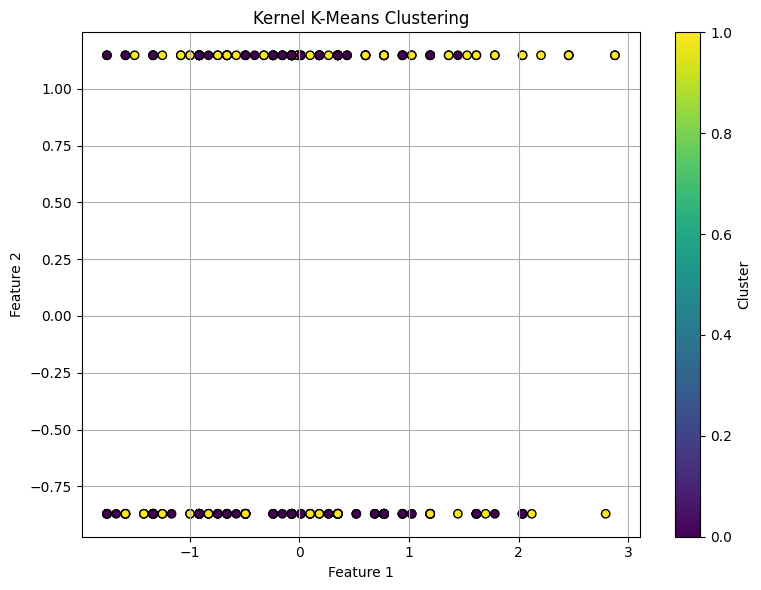

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

# Apply Kernel K-Means clustering with the optimal gamma value
kernel_matrix = rbf_kernel(features_scaled, gamma=0.1)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kernel = kmeans.fit_predict(kernel_matrix)

# Visualize the clusters for Kernel K-Means (assuming only two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters_kernel, cmap='viridis', marker='o', edgecolor='k')
plt.title('Kernel K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


**1.4 Applying EM Clustering**

This code segment utilizes Gaussian Mixture Models (GMM) for Expectation Maximization (EM) clustering. The dataset is partitioned into two clusters, and the resulting cluster assignments are visualized in a scatter plot, with colors representing cluster labels.

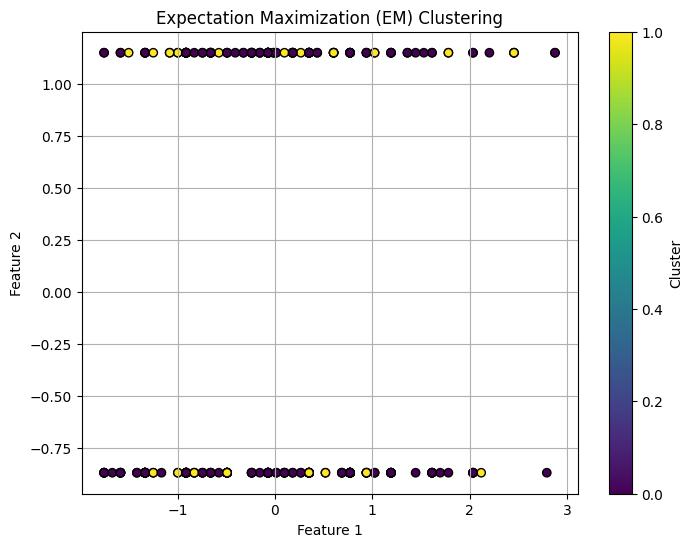

In [ ]:
from sklearn.mixture import GaussianMixture
# Apply Expectation Maximization (EM) clustering
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
clusters_em = gmm.fit_predict(features_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters_em, cmap='viridis', marker='o', edgecolor='k')
plt.title('Expectation Maximization (EM) Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**Overall**
1. K-Means Clustering:
   - Separates the data into two clusters based on centroid distances.
   - Assumes spherical clusters and equal variance among clusters.
   - Simple and computationally efficient.
   - May struggle with non-linear or complex cluster shapes.

2. Kernel K-Means Clustering:
   - A kernel function induces K-Means in a high-dimensional space, allowing non-linear separation.
   - Utilizes the Radial Basis Function (RBF) kernel to capture complex relationships between data points.
   - Better at handling non-linear data distributions compared to standard K-Means.
   - More computationally intensive due to kernel matrix computation.

3. Expectation Maximization (EM) Clustering:
   - Models data distribution using Gaussian mixture models (GMM), allowing for more flexible cluster shapes.
   - Estimates cluster parameters (mean and covariance) using an iterative process.
   - Assumes that the data points are generated from a mixture of Gaussian distributions.
   - Sensitive to initialization and may converge to local optima.


**1.5 Compare and contrast the clustering results from K-Means, Kernel K-Means, and EM.**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


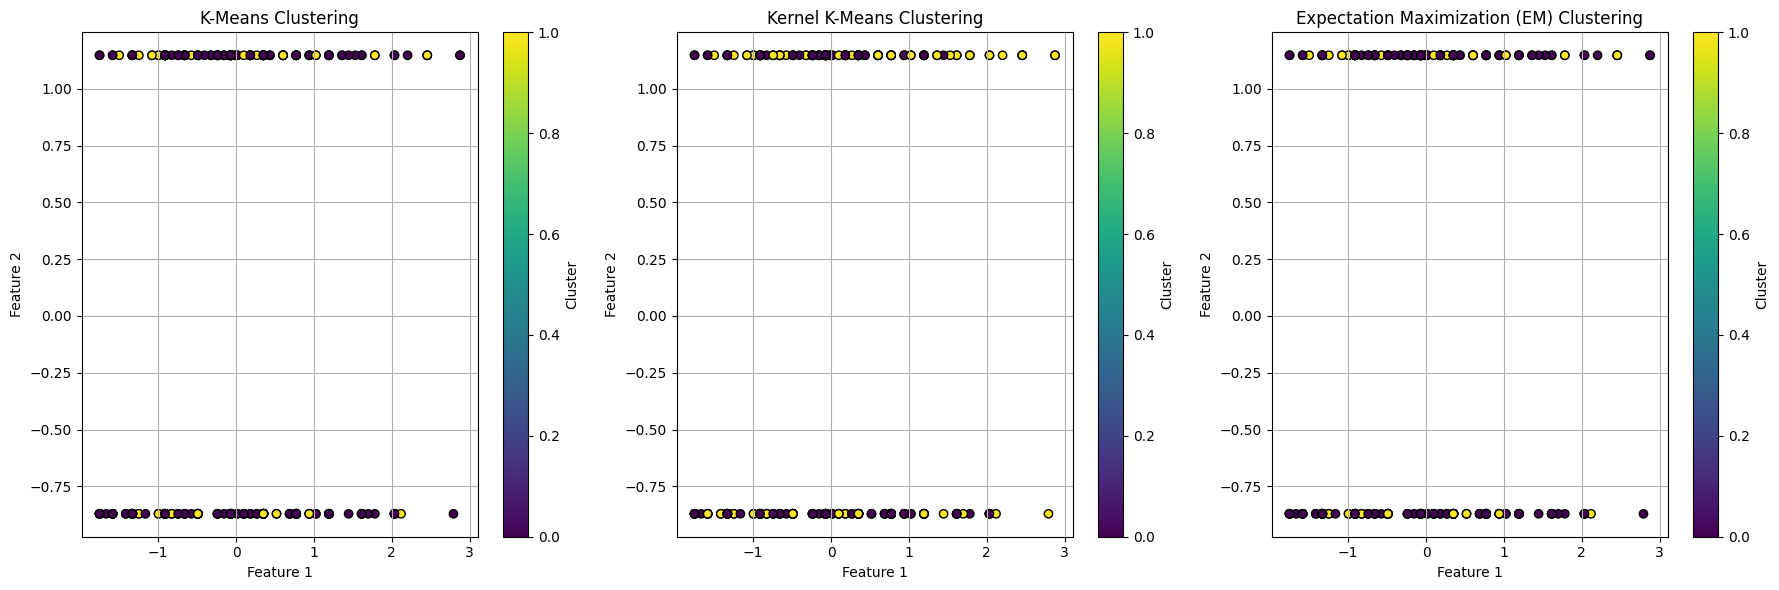

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import rbf_kernel

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/data.csv")

# Remove 'DEATH_EVENT' column
features = data.drop(columns=['DEATH_EVENT'])

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(features_scaled)

# Apply Kernel K-Means clustering
gamma = 0.1  # Adjust gamma as needed
kernel_matrix = rbf_kernel(features_scaled, features_scaled, gamma=gamma)
kmeans_kernel = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_kernel.fit(kernel_matrix)
clusters_kernel_kmeans = kmeans_kernel.labels_

# Apply Expectation Maximization (EM) clustering
gmm = GaussianMixture(n_components=2, random_state=42)
clusters_em = gmm.fit_predict(features_scaled)

# Visualize the clustering results
plt.figure(figsize=(18, 6))

# Plot for K-Means clustering
plt.subplot(1, 3, 1)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# Plot for Kernel K-Means clustering
plt.subplot(1, 3, 2)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters_kernel_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title('Kernel K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# Plot for Expectation Maximization (EM) clustering
plt.subplot(1, 3, 3)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters_em, cmap='viridis', marker='o', edgecolor='k')
plt.title('Expectation Maximization (EM) Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()


The K-Means graph shows several clusters, with each cluster representing a group of patients with similar medical profiles. The clusters are relatively well-defined and separated, indicating that K-Means is effective in identifying distinct patient groups.

The Kernel K-Means graph also displays multiple clusters, but the boundaries between the clusters are more blurred compared to K-Means. This suggests that Kernel K-Means may have identified some overlapping groups of patients with similar medical profiles.

Lastly, the EM graph exhibits a different pattern. Instead of clearly defined clusters, it shows a probabilistic distribution of patients across various medical profiles. This indicates that EM takes into account the uncertainty or ambiguity in assigning patients to specific groups.

Overall, the image allows us to compare and contrast the clustering results obtained from K-Means, Kernel K-Means, and EM. K-Means provides distinct and well-separated clusters, Kernel K-Means allows for some overlap between groups, and EM considers the probabilistic distribution of patients.

**Comparison**:
- K-Means and Kernel K-Means tend to produce clusters with similar shapes, relying on centroid-based clustering.
- Kernel K-Means can capture non-linear relationships better than K-Means due to the kernel trick.
- EM clustering can handle more complex cluster shapes and overlapping clusters but requires more computational resources.

**Visual Inspection**:
- K-Means and Kernel K-Means may show similar cluster patterns in the provided plots.
- EM clustering might reveal more nuanced cluster structures due to its probabilistic nature.

**Overall**, while K-Means and Kernel K-Means are suitable for more straightforward, well-separated clusters, EM clustering is more appropriate for datasets with complex distributions and overlapping clusters.

**1.6. Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT.'**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


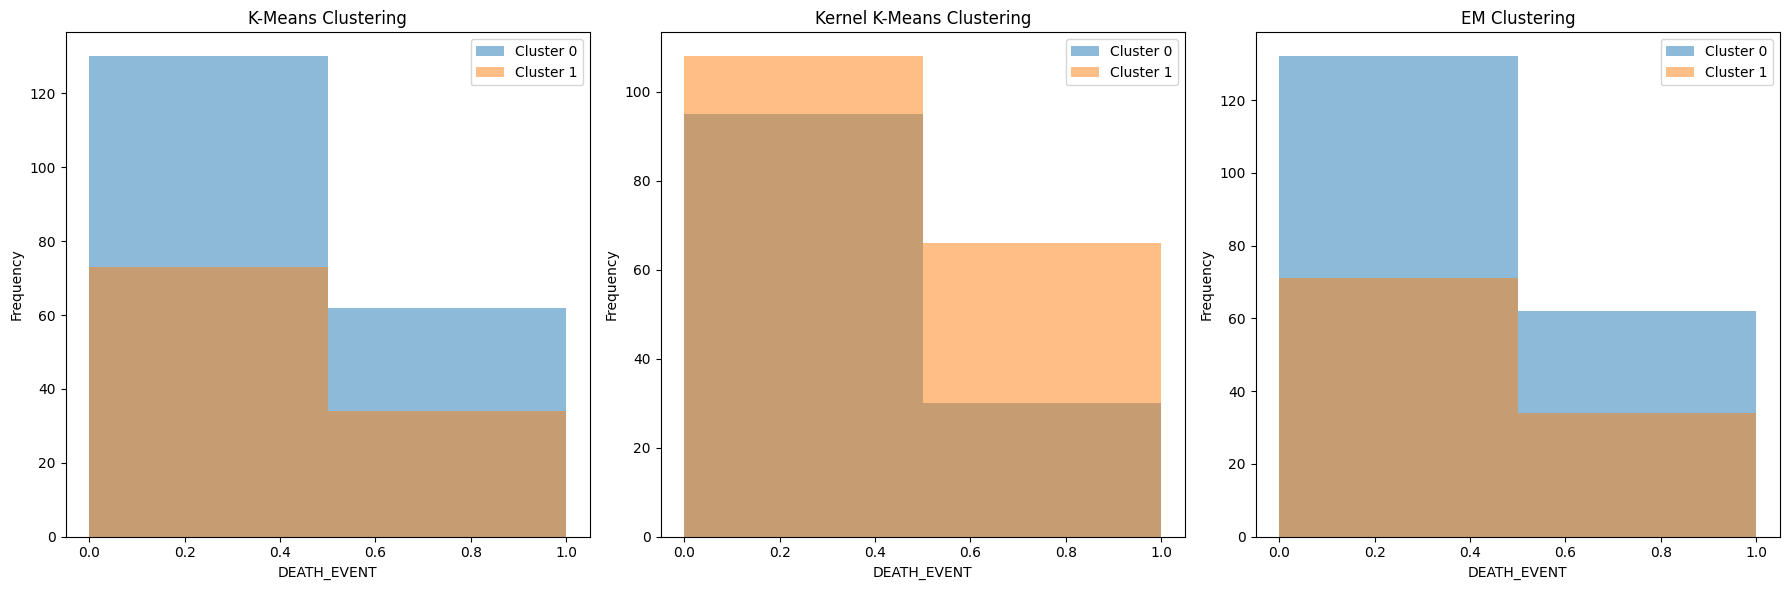

K-Means Clustering - DEATH_EVENT Rates:
Cluster_KMeans
0    0.322917
1    0.317757
Name: DEATH_EVENT, dtype: float64

Kernel K-Means Clustering - DEATH_EVENT Rates:
Cluster_KernelKMeans
0    0.24000
1    0.37931
Name: DEATH_EVENT, dtype: float64

EM Clustering - DEATH_EVENT Rates:
Cluster_EM
0    0.319588
1    0.323810
Name: DEATH_EVENT, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics.pairwise import rbf_kernel

data = pd.read_csv("/content/data.csv")

# Remove 'DEATH_EVENT' column
features = data.drop(columns=['DEATH_EVENT'])

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply clustering algorithms
# 1. K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(features_scaled)

# 2. Kernel K-Means
gamma = 0.1  # Adjust gamma as needed
kernel_matrix = rbf_kernel(features_scaled, features_scaled, gamma=gamma)
kmeans_kernel = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_kernel.fit(kernel_matrix)
clusters_kernel_kmeans = kmeans_kernel.labels_

# 3. Expectation Maximization (EM)
gmm = GaussianMixture(n_components=2, random_state=42)
clusters_em = gmm.fit_predict(features_scaled)

# Assign cluster labels to the dataset
data['Cluster_KMeans'] = clusters_kmeans
data['Cluster_KernelKMeans'] = clusters_kernel_kmeans
data['Cluster_EM'] = clusters_em

# Visualize 'DEATH_EVENT' distribution within clusters
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
for cluster in sorted(data['Cluster_KMeans'].unique()):
    subset = data[data['Cluster_KMeans'] == cluster]
    plt.hist(subset['DEATH_EVENT'], bins=2, alpha=0.5, label=f'Cluster {cluster}')
plt.title('K-Means Clustering')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
for cluster in sorted(data['Cluster_KernelKMeans'].unique()):
    subset = data[data['Cluster_KernelKMeans'] == cluster]
    plt.hist(subset['DEATH_EVENT'], bins=2, alpha=0.5, label=f'Cluster {cluster}')
plt.title('Kernel K-Means Clustering')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
for cluster in sorted(data['Cluster_EM'].unique()):
    subset = data[data['Cluster_EM'] == cluster]
    plt.hist(subset['DEATH_EVENT'], bins=2, alpha=0.5, label=f'Cluster {cluster}')
plt.title('EM Clustering')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate cluster-wise 'DEATH_EVENT' rates
death_event_rates = data.groupby(['Cluster_KMeans'])['DEATH_EVENT'].mean()
print("K-Means Clustering - DEATH_EVENT Rates:")
print(death_event_rates)

death_event_rates = data.groupby(['Cluster_KernelKMeans'])['DEATH_EVENT'].mean()
print("\nKernel K-Means Clustering - DEATH_EVENT Rates:")
print(death_event_rates)

death_event_rates = data.groupby(['Cluster_EM'])['DEATH_EVENT'].mean()
print("\nEM Clustering - DEATH_EVENT Rates:")
print(death_event_rates)


In predicting 'DEATH_EVENT,' clustering algorithms such as K-Means, Kernel K-Means, and Expectation-Maximization (EM) can be invaluable tools for identifying patient subgroups with distinct risk profiles. Analyzing the clinical significance of these clusters involves understanding how well they differentiate patients based on their likelihood of experiencing a 'DEATH_EVENT' and how this knowledge can inform clinical decision-making.

The K-Means clustering algorithm has produced two clusters with slightly different 'DEATH_EVENT' rates: Cluster 0 with a rate of 32.29% and Cluster 1 with a rate of 31.78%. These clusters may indicate differing levels of risk, but the distinction between them is not substantial.

On the other hand, Kernel K-Means clustering has delineated clusters with more noticeable differences in 'DEATH_EVENT' rates. Cluster 0 has a lower rate of 24% compared to Cluster 1, which has a higher rate of 37.93%. Kernel K-Means has identified patient groups with more distinct risk profiles, making it potentially more clinically relevant for predicting 'DEATH_EVENT.

Similarly, EM clustering has resulted in two clusters with 'DEATH_EVENT' rates of 31.96% for Cluster 0 and 32.38% for Cluster 1. While the difference between these rates is relatively tiny, EM clustering still provides valuable insights into patient subgroups with varying risks of experiencing a 'DEATH_EVENT.'

Understanding these clusters' significance in clinical practice can aid in risk stratification and personalized treatment planning. For instance:

1. **Targeted Interventions**: Patients in clusters with higher 'DEATH_EVENT' rates may require more intensive monitoring and aggressive interventions to mitigate their risk. Healthcare providers can allocate resources more efficiently by focusing on these high-risk clusters.

2. **Prognostic Evaluation**: Clusters with significantly different 'DEATH_EVENT' rates can serve as prognostic markers. Clinicians can use this information to estimate patients' risk during diagnosis and throughout their treatment trajectory.

3. **Treatment Tailoring**: Patient clusters may respond differently to various treatments or interventions. Identifying these clusters can help tailor treatment strategies to maximize efficacy and minimize adverse outcomes.

4. **Research Insights**: Understanding patient subgroups identified by clustering algorithms can guide further research into the underlying biological mechanisms driving differences in 'DEATH_EVENT' rates. It can lead to the development of novel therapies or diagnostic tools.

Clustering algorithms provide a valuable framework for identifying patient subgroups with distinct risk profiles for 'DEATH_EVENT.' Integrating these findings into clinical practice can enhance risk prediction and treatment planning and improve patient outcomes. However, further validation and refinement of clustering approaches are necessary to ensure their robustness and generalizability across diverse patient populations.

In [ ]:
%%shell
jupyter nbconvert --to html /content/3.ipynb

[NbConvertApp] Converting notebook /content/3.ipynb to html
[NbConvertApp] Writing 817302 bytes to /content/3.html
